# Ordinary Least Squares Regression

Topic Overview
Ordinary least squares regression combines the linear models and L2 loss function introduced last week. Ordinary least squares regression was first published around 1805 and is both the first and most rigorously studied regression method. The method was considered important enough that the famous mathematicians Adrien-Marie Legendre and Carl Friedrich Gauss fought over who first invented it. It was in fact Legendre who published it first. 

This week, we will cover the mathematical formulation for ordinary least squares regression, how to implement it in code, and appropriate visualizations of the resulting linear model's behavior. We will not cover the mathematical derivation of the method yet, as that will require linear algebra, which will be addressed later in this module. 

#### By the end of this topic, you should be able to:

- State the functional form of a linear model and its loss function for linear regression
- Use scikit-learn to fit linear models and make predictions
- Visualize the output of linear models compared to the training data

# 4.1 Lesson: Mathematical Definition

# Mathematical Definition

What exactly is ordinary least squares regression? We will define it in three stages: regression, linear regression, and ordinary least squares regression.

## Definition: Regression

Regression is a process of estimating the relationship between inputs and outputs of a function with parameters. In particular, regression picks the parameter values to best match known outputs for a given set of inputs.

In data science, we use regression to refer to training a model to match outputs for a given dataset's inputs.

## Definition: Linear Regression

Linear regression, in turn, is regression with a linear model. Using the matrix notation for dataset $X$ with $m$ rows and $n$ columns, and a linear model represented by matrix $C$ with $n+1$ parameters,

$$
f(X_i) = \sum_{j=0}^{n-1} (X_{i,j} * C_j) + C_n
$$

Linear regression picks the best values for the parameters in $C$.

Finally, ordinary least squares regression is performing linear regression by minimizing the squared errors between the prediction, $f(X)$, and the true value $y$. Minimizing squared errors should sound familiar — that is minimizing the $L_2$ loss function. So ordinary least squares regression is empirical risk minimization using linear models and the $L_2$ loss function. This is not a coincidence — ordinary least squares regression was one of the cited examples for empirical risk minimization. Ordinary least squares regression is so common that both of the phrases "ordinary least squares" and "linear regression" default to this kind of regression.

Here's a more precise mathematical formulation:

## Definition: Ordinary Least Squares Regression

Given a training set $X$ of $m$ rows and $n$ columns and all values are numbers, and the target outputs $Y$, the ordinary least squares regression of that training set is the linear model

$$
f(X_i) = \sum_{j=0}^{n-1} (X_{i,j} * C_j) + C_n
$$

where $C_0, \ldots, C_n$ are picked to minimize

$$
\text{loss} = \frac{1}{m} \sum_{i=0}^{m-1} \left( \sum_{j=0}^{n-1} (X_{i,j} * C_j) + C_n - Y_j \right)^2
$$

How do we pick those parameters for this regression? We will cover this next.

### Required Resources:

Read | DS 701 Lecture Notes: Linear Models. These lecture notes give historical context on the development of linear regression and sketch the analytic solution.

In [64]:
from sklearn import datasets
import statsmodels.api as sm
X, y = datasets.make_regression(n_samples=100, n_features=20, n_informative=5, bias=0.1, noise=30, random_state=1)

In [65]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              123.8
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                    1.03e-51
Time:                        06:54:15   Log-Likelihood:                         -468.30
No. Observations:                 100   AIC:                                      976.6
Df Residuals:                      80   BIC:                                      1029.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The $R^2$ value is very good. We can see that the linear model does a very good job of predicting the observations $y_{i}$.

However, some of the independent variables may not contribute to the accuracy of the prediction.

Note that each parameter of an independent variable has an associated confidence interval.

If a coefficient is not distinguishable from zero, then we cannot assume that there is any relationship between the independent variable and the observations.

In other words, if the confidence interval for the parameter includes zero, the associated independent variable may not have any predictive value.

In [66]:
print('Confidence Intervals: {}'.format(results.conf_int()))
print('Parameters: {}'.format(results.params))

Confidence Intervals: [[  5.65891465  19.47559281]
 [ -9.44032559   1.77614877]
 [ -9.31636359   4.47701749]
 [ -4.12661379   8.15524508]
 [ -9.4808662    4.22965424]
 [ -5.49698033   7.07574692]
 [-10.22359973   4.08684835]
 [ 83.74738375  96.52928603]
 [ -6.77896356   6.75226985]
 [  8.80365396  21.73126149]
 [ -6.86882065   6.4194618 ]
 [ -6.97868351   7.1332267 ]
 [ -6.71228582   6.2218515 ]
 [ 82.96557061  97.07028228]
 [ -5.74782503   9.08465366]
 [ -1.06173893   9.85081724]
 [  2.02753258  15.5561241 ]
 [ 66.56165458  80.19256546]
 [ -8.90825108   5.0804296 ]
 [ -7.85545335   5.21424811]]
Parameters: [ 1.25672537e+01 -3.83208841e+00 -2.41967305e+00  2.01431564e+00
 -2.62560598e+00  7.89383294e-01 -3.06837569e+00  9.01383349e+01
 -1.33468527e-02  1.52674577e+01 -2.24679428e-01  7.72715974e-02
 -2.45217158e-01  9.00179264e+01  1.66841432e+00  4.39453916e+00
  8.79182834e+00  7.33771100e+01 -1.91391074e+00 -1.32060262e+00]


In [67]:
CIs = results.conf_int()
notSignificant = (CIs[:,0] < 0) & (CIs[:,1] > 0)
notSignificant

array([False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True])

In [68]:
Xsignif = X[:,~notSignificant]
Xsignif.shape

(100, 6)

By eliminating independent variables that are not significant, we help avoid overfitting.

In [69]:
model = sm.OLS(y, Xsignif)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              437.1
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                    2.38e-66
Time:                        06:54:15   Log-Likelihood:                         -473.32
No. Observations:                 100   AIC:                                      958.6
Df Residuals:                      94   BIC:                                      974.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Read | Mathematics for Machine Learning, Chapter 9-9.2.2: Linear Regression. This chapter motivates linear regression from the problem of modeling noisy data, presenting the same linear regression formula as a maximum likelihood solution.

## 9.1 Problem Formation 

Because of the presence of observation noise, we will adopt a probabilistic approach and explicitly model the noise using a likelihood function. More specifically, throughout this chapter, we consider a regression problem with the likelihood function

$$
p(y | x) = \mathcal{N}(y | f(x), \sigma^2). \tag{9.1}
$$

Here, $x \in \mathbb{R}^D$ are inputs and $y \in \mathbb{R}$ are noisy function values (targets). With (9.1), the functional relationship between $x$ and $y$ is given as

$$
y = f(x) + \epsilon, \tag{9.2}
$$

where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ is independent, identically distributed (i.i.d.) Gaussian measurement noise with mean 0 and variance $\sigma^2$. Our objective is to find a function that is close (similar) to the unknown function $f$ that generated the data and that generalizes well.

In this chapter, we focus on parametric models, i.e., we choose a parametrized function and find parameters $\theta$ that "work well" for modeling the data. For the time being, we assume that the noise variance $\sigma^2$ is known and focus on learning the model parameters $\theta$. In linear regression, we consider the special case that the parameters $\theta$ appear linearly in our model. An example of linear regression is given by

$$
p(y | x, \theta) = \mathcal{N}(y | x^\top \theta, \sigma^2) \tag{9.3}
$$

$$
\iff y = x^\top \theta + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2), \tag{9.4}
$$

where $\theta \in \mathbb{R}^D$ are the parameters we seek. The class of functions described by (9.4) are straight lines that pass through the origin. In (9.4), we chose a parametrization $f(x) = x^\top \theta$.

The likelihood in (9.3) is the probability density function of $y$ evaluated at $x^\top \theta$. Note that the only source of uncertainty originates from the observation noise (as $x$ and $\theta$ are assumed known in (9.3)). Without observation noise, the relationship between $x$ and $y$ would be deterministic and (9.3) would be a Dirac delta.

### Example 9.1

For $x, \theta \in \mathbb{R}$ the linear regression model in (9.4) describes straight lines (linear functions), and the parameter $\theta$ is the slope of the line. Figure 9.2(a) shows some example functions for different values of $\theta$.

The linear regression model in (9.3)-(9.4) is not only linear in the parameters, but also linear in the inputs $x$. Figure 9.2(a) shows examples of such functions. We will see later that $y = \phi^\top (x) \theta$ for nonlinear transformations $\phi$ is also a linear regression model because "linear regression."

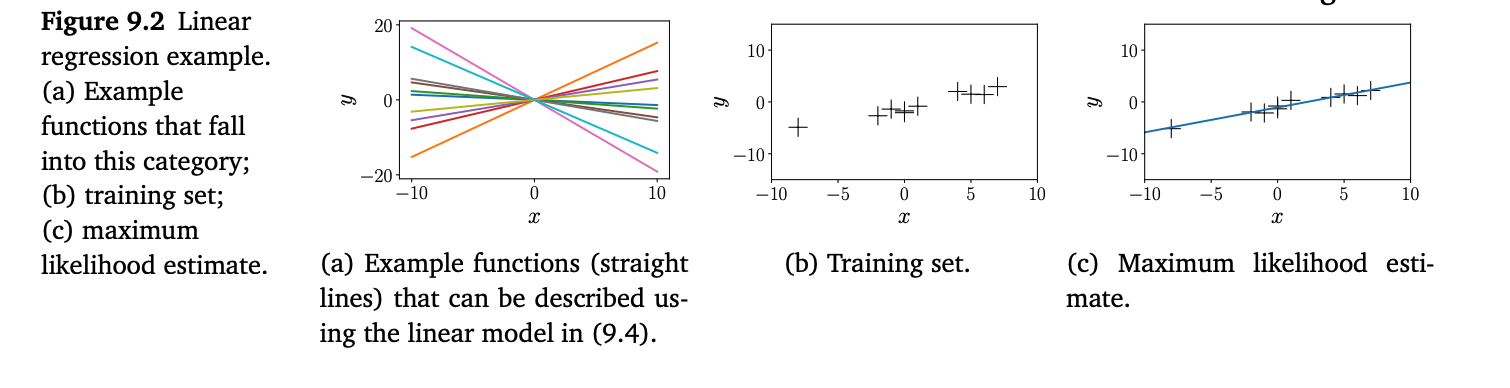

### 9.2 Parameter Estimation

Consider the linear regression setting (9.4) and assume we are given a training set $\mathcal{D} := \{(x_1, y_1), \dots, (x_N, y_N)\}$ consisting of $N$ inputs $x_n \in \mathbb{R}^D$ and corresponding observations/targets $y_n \in \mathbb{R}, n = 1, \dots, N$. The corresponding graphical model is given in Figure 9.3. Note that $y_i$ and $y_j$ are conditionally independent given their respective inputs $x_i, x_j$ so that the likelihood factorizes according to

$$
p(\mathcal{Y} | \mathcal{X}, \theta) = p(y_1, \dots, y_N | x_1, \dots, x_N, \theta) \tag{9.5a}
$$

$$
= \prod_{n=1}^N p(y_n | x_n, \theta) = \prod_{n=1}^N \mathcal{N}(y_n | x_n^\top \theta, \sigma^2), \tag{9.5b}
$$

where we defined $\mathcal{X} := \{x_1, \dots, x_N\}$ and $\mathcal{Y} := \{y_1, \dots, y_N\}$ as the sets of training inputs and corresponding targets, respectively. The likelihood and the factors $p(y_n | x_n, \theta)$ are Gaussian due to the noise distribution; see (9.3).

In the following, we will discuss how to find optimal parameters $\theta^* \in \mathbb{R}^D$ for the linear regression model (9.4). Once the parameters $\theta^*$ are found, we can predict function values by using this parameter estimate in (9.4) so that at an arbitrary test input $x_*$ the distribution of the corresponding target $y_*$ is

$$
p(y_* | x_*, \theta^*) = \mathcal{N}(y_* | x_*^\top \theta^*, \sigma^2). \tag{9.6}
$$

In the following, we will have a look at parameter estimation by maximizing the likelihood, a topic that we already covered to some degree in Section 8.3.

### 9.2.1 Maximum Likelihood Estimation

A widely used approach to finding the desired parameters $\theta_{\text{ML}}$ is *maximum likelihood estimation*, where we find parameters $\theta_{\text{ML}}$ that maximize the likelihood (9.5b). Intuitively, maximizing the likelihood means maximizing the predictive distribution of the training data given the model parameters. We obtain the maximum likelihood parameters as

$$
\theta_{\text{ML}} \in \underset{\theta}{\text{arg max}} \, p(\mathcal{Y} | \mathcal{X}, \theta). \tag{9.7}
$$

#### Remark.
The likelihood $p(y | x, \theta)$ is not a probability distribution in $\theta$: It is simply a function of the parameters $\theta$ but does not integrate to 1 (i.e., it is unnormalized), and may not even be integrable with respect to $\theta$. However, the likelihood in (9.7) is a normalized probability distribution in $y$.

To find the desired parameters $\theta_{\text{ML}}$ that maximize the likelihood, we typically perform gradient ascent (or gradient descent on the negative likelihood). In the case of linear regression we consider here, however, a closed-form solution exists, which makes iterative gradient descent unnecessary. In practice, instead of maximizing the likelihood directly, we apply the log-transformation to the likelihood function and minimize the negative log-likelihood.

#### Remark (Log-Transformation).

Since the likelihood (9.5b) is a product of $N$ Gaussian distributions, the log-transformation is useful since (a) it does not suffer from numerical underflow, and (b) the differentiation rules will turn out simpler. More specifically, numerical underflow will be a problem when we multiply $N$ probabilities, where $N$ is the number of data points, since we cannot represent very small numbers, such as $10^{-256}$. Furthermore, the log-transform will turn the product into a sum of log-probabilities such that the corresponding gradient is a sum of individual gradients, instead of a repeated application of the product rule (5.46) to compute the gradient of a product of $N$ terms.

To find the optimal parameters $\theta_{\text{ML}}$ of our linear regression problem, we minimize the negative log-likelihood

$$
- \log p(\mathcal{Y} | \mathcal{X}, \theta) = - \log \prod_{n=1}^{N} p(y_n | x_n, \theta) = - \sum_{n=1}^{N} \log p(y_n | x_n, \theta), \tag{9.8}
$$

where we exploited that the likelihood (9.5b) factorizes over the number of data points due to our independence assumption on the training set.

In the linear regression model (9.4), the likelihood is Gaussian (due to the Gaussian additive noise term), such that we arrive at

$$
\log p(y_n | x_n, \theta) = - \frac{1}{2\sigma^2} (y_n - x_n^\top \theta)^2 + \text{const}, \tag{9.9}
$$

where the constant includes all terms independent of $\theta$.

From the negative log-likelihood (9.8), we obtain (ignoring the constant terms)

$$
\mathcal{L}(\theta) := \frac{1}{2\sigma^2} \sum_{n=1}^{N} (y_n - x_n^\top \theta)^2 \tag{9.10a}
$$

$$
= \frac{1}{2\sigma^2} (y - X\theta)^\top (y - X\theta) = \frac{1}{2\sigma^2} \|y - X\theta\|^2, \tag{9.10b}
$$

where we define the **design matrix** $X := [x_1, \dots, x_N]^\top \in \mathbb{R}^{N \times D}$ as the collection of training inputs and $y := [y_1, \dots, y_N]^\top \in \mathbb{R}^{N}$ as a vector that collects all training targets. Note that the $n$th row in the design matrix $X$ corresponds to the training input $x_n$. In (9.10b), we used the fact that the sum of squared errors between the observations $y_n$ and the corresponding model prediction $x_n^\top \theta$ equals the squared distance between $y$ and $X\theta$.

With (9.10b), we now have a concrete form of the negative log-likelihood function we need to optimize. We immediately see that (9.10b) is quadratic in $\theta$. This means that we can find a unique global solution $\theta_{\text{ML}}$ for minimizing the negative log-likelihood $\mathcal{L}$. We can find the global optimum by computing the gradient of $\mathcal{L}$, setting it to $0$ and solving for $\theta$.

Using the results from Chapter 5, we compute the gradient of $\mathcal{L}$ with respect to the parameters as

$$
\frac{d\mathcal{L}}{d\theta} = \frac{d}{d\theta} \left( \frac{1}{2\sigma^2} (y - X\theta)^\top (y - X\theta) \right) \tag{9.11a}
$$

$$
= \frac{1}{\sigma^2} \frac{d}{d\theta} \left( y^\top y - 2y^\top X\theta + \theta^\top X^\top X\theta \right) \tag{9.11b}
$$

$$
= \frac{1}{\sigma^2} (-y^\top X + \theta^\top X^\top X) \in \mathbb{R}^{1 \times D}. \tag{9.11c}
$$

The maximum likelihood estimator $\theta_{\text{ML}}$ solves $\frac{d\mathcal{L}}{d\theta} = 0^\top$ (necessary optimality condition) and we obtain

$$
\frac{d\mathcal{L}}{d\theta} = 0^\top \implies \theta_{\text{ML}}^\top X^\top X = y^\top X \tag{9.12a}
$$

$$
\iff \theta_{\text{ML}} = y^\top X (X^\top X)^{-1} \tag{9.12b}
$$

$$
\iff \theta_{\text{ML}} = (X^\top X)^{-1} X^\top y. \tag{9.12c}
$$

We could right-multiply the first equation by $(X^\top X)^{-1}$ because $X^\top X$ is positive definite if $\text{rk}(X) = D$, where $\text{rk}(X)$ denotes the rank of $X$.

#### Remark.
Setting the gradient to $0^\top$ is a necessary and sufficient condition, and we obtain a global minimum since the Hessian $\nabla_{\theta}^2 \mathcal{L}(\theta) = X^\top X \in \mathbb{R}^{D \times D}$ is positive definite.

#### Remark.
The maximum likelihood solution in (9.12c) requires us to solve a system of linear equations of the form $A\theta = b$ with $A = (X^\top X)$ and $b = X^\top y$.

### Example 9.2 (Fitting Lines)

Let us have a look at Figure 9.2, where we aim to fit a straight line $f(x) = \theta x$, where $\theta$ is an unknown slope, to a dataset using maximum likelihood estimation. Examples of functions in this model class (straight lines) are shown in Figure 9.2(a). For the dataset shown in Figure 9.2(b), we find the maximum likelihood estimate of the slope parameter $\theta$ using (9.12c) and obtain the maximum likelihood linear function in Figure 9.2(c).

### Maximum Likelihood Estimation with Features

So far, we considered the linear regression setting described in (9.4), which allowed us to fit straight lines to data using maximum likelihood estimation. However, straight lines are not sufficiently expressive when it comes to fitting more interesting data. Fortunately, linear regression offers us a way to fit nonlinear functions within the linear regression framework: Since "linear regression" only refers to "linear in the parameters", we can perform an arbitrary nonlinear transformation $\phi(x)$ of the inputs $x$ and then linearly combine the components of this transformation. The corresponding linear regression model is

$$
p(y | x, \theta) = \mathcal{N}(y | \phi^\top(x)\theta, \sigma^2)
$$

$$
\iff y = \phi^\top(x) \theta + \epsilon = \sum_{k=0}^{K-1} \theta_k \phi_k(x) + \epsilon, \tag{9.13}
$$

where $\phi : \mathbb{R}^D \to \mathbb{R}^K$ is a (nonlinear) transformation of the inputs $x$ and $\phi_k : \mathbb{R}^D \to \mathbb{R}$ is the $k$th component of the feature vector $\phi$. Note that the model parameters $\theta$ still appear only linearly.

### Example 9.3 (Polynomial Regression)

We are concerned with a regression problem $y = \phi^\top(x)\theta + \epsilon$, where $x \in \mathbb{R}$ and $\theta \in \mathbb{R}^K$. A transformation that is often used in this context is

$$
\phi(x) = 
\begin{bmatrix}
\phi_0(x) \\
\phi_1(x) \\
\vdots \\
\phi_{K-1}(x)
\end{bmatrix}
=
\begin{bmatrix}
1 \\
x \\
x^2 \\
x^3 \\
\vdots \\
x^{K-1}
\end{bmatrix} \in \mathbb{R}^K. \tag{9.14}
$$

This means that we "lift" the original one-dimensional input space into a $K$-dimensional feature space consisting of all monomials $x^k$ for $k = 0, \dots, K - 1$. With these features, we can model polynomials of degree $\leq K-1$ within the framework of linear regression: A polynomial of degree...

$$K - 1 \text{ is}$$

$$
f(x) = \sum_{k=0}^{K-1} \theta_k x^k = \phi^\top(x) \theta, \tag{9.15}
$$

where $\phi$ is defined in (9.14) and $\theta = [\theta_0, \dots, \theta_{K-1}]^\top \in \mathbb{R}^K$ contains the (linear) parameters $\theta_k$.

Let us now have a look at maximum likelihood estimation of the parameters $\theta$ in the linear regression model (9.13). We consider training inputs $x_n \in \mathbb{R}^D$ and targets $y_n \in \mathbb{R}, n = 1, \dots, N$, and define the **feature matrix** (design matrix) as

$$
\Phi := 
\begin{bmatrix}
\phi^\top(x_1) \\
\vdots \\
\phi^\top(x_N)
\end{bmatrix}
=
\begin{bmatrix}
\phi_0(x_1) & \dots & \phi_{K-1}(x_1) \\
\phi_0(x_2) & \dots & \phi_{K-1}(x_2) \\
\vdots & \dots & \vdots \\
\phi_0(x_N) & \dots & \phi_{K-1}(x_N)
\end{bmatrix} \in \mathbb{R}^{N \times K}, \tag{9.16}
$$

where $\Phi_{ij} = \phi_j(x_i)$ and $\phi_j : \mathbb{R}^D \to \mathbb{R}$.

### Example 9.4 (Feature Matrix for Second-order Polynomials)

For a second-order polynomial and $N$ training points $x_n \in \mathbb{R}, n = 1, \dots, N$, the feature matrix is

$$
\Phi = 
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_N & x_N^2
\end{bmatrix}. \tag{9.17}
$$

With the feature matrix $\Phi$ defined in (9.16), the negative log-likelihood for the linear regression model (9.13) can be written as

$$
- \log p(\mathcal{Y} | \mathcal{X}, \theta) = \frac{1}{2\sigma^2} (y - \Phi \theta)^\top (y - \Phi \theta) + \text{const}. \tag{9.18}
$$

Comparing (9.18) with the negative log-likelihood in (9.10b) for the "feature-free" model, we immediately see we just need to replace $X$ with $\Phi$. Since both $X$ and $\Phi$ are independent of the parameters $\theta$ that we wish to optimize, we arrive immediately at the maximum likelihood estimate

$$
\theta_{\text{ML}} = (\Phi^\top \Phi)^{-1} \Phi^\top y \tag{9.19}
$$

for the linear regression problem with nonlinear features defined in (9.13).

#### Remark.
When we were working without features, we required $X^\top X$ to be invertible, which is the case when $\text{rk}(X) = D$, i.e., the columns of $X$...

In (9.19), we therefore require $\Phi^\top \Phi \in \mathbb{R}^{K \times K}$ to be invertible. This is the case if and only if $\text{rk}(\Phi) = K$.

### Example 9.5 (Maximum Likelihood Polynomial Fit)

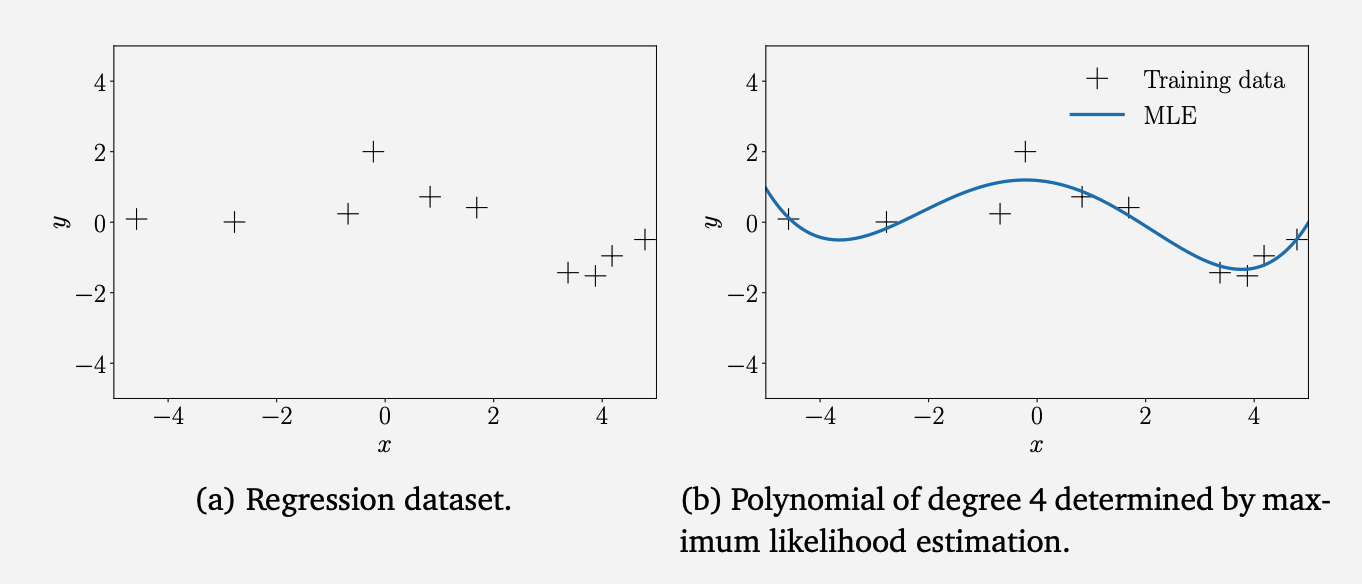

Consider the dataset in Figure 9.4(a). The dataset consists of $N = 10$ pairs $(x_n, y_n)$, where $x_n \sim \mathcal{U}[-5, 5]$ and $y_n = -\sin(x_n/5) + \cos(x_n) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, 0.2^2)$.

We fit a polynomial of degree 4 using maximum likelihood estimation, i.e., parameters $\theta_{\text{ML}}$ are given in (9.19). The maximum likelihood estimate yields function values $\phi^\top(x_*)\theta_{\text{ML}}$ at any test location $x_*$. The result is shown in Figure 9.4(b).

### Estimating the Noise Variance

Thus far, we assumed that the noise variance $\sigma^2$ is known. However, we can also use the principle of maximum likelihood estimation to obtain the maximum likelihood estimator $\sigma^2_{\text{ML}}$ for the noise variance. To do this, we follow the standard procedure: We write down the log-likelihood, compute its derivative with respect to $\sigma^2 > 0$, set it to 0, and solve. The log-likelihood is given by

$$
\log p(\mathcal{Y} | \mathcal{X}, \theta, \sigma^2) = \sum_{n=1}^{N} \log \mathcal{N}(y_n | \phi^\top(x_n)\theta, \sigma^2) \tag{9.20a}
$$

$$
= \sum_{n=1}^{N} \left( - \frac{1}{2} \log(2\pi) - \frac{1}{2} \log \sigma^2 - \frac{1}{2\sigma^2} (y_n - \phi^\top(x_n)\theta)^2 \right) \tag{9.20b}
$$

$$
= - \frac{N}{2} \log \sigma^2 - \frac{1}{2\sigma^2} \sum_{n=1}^{N} (y_n - \phi^\top(x_n)\theta)^2 + \text{const}. \tag{9.20c}
$$

The partial derivative of the log-likelihood with respect to $\sigma^2$ is then

$$
\frac{\partial \log p(\mathcal{Y} | \mathcal{X}, \theta, \sigma^2)}{\partial \sigma^2} = - \frac{N}{2\sigma^2} + \frac{1}{2\sigma^4} s = 0 \tag{9.21a}
$$

$$
\iff \frac{N}{2\sigma^2} = \frac{s}{2\sigma^4} \tag{9.21b}
$$

so that we identify

$$
\sigma^2_{\text{ML}} = \frac{s}{N} = \frac{1}{N} \sum_{n=1}^{N} (y_n - \phi^\top(x_n)\theta)^2. \tag{9.22}
$$

Therefore, the maximum likelihood estimate of the noise variance is the empirical mean of the squared distances between the noise-free function values $\phi^\top(x_n)\theta$ and the corresponding noisy observations $y_n$ at input locations $x_n$.

### 9.2.2 Overfitting in Linear Regression

We just discussed how to use maximum likelihood estimation to fit linear models (e.g., polynomials) to data. We can evaluate the quality of the model by computing the error/loss incurred. One way of doing this is to compute the negative log-likelihood (9.10b), which we minimized to determine the maximum likelihood estimator. Alternatively, given that the noise parameter $\sigma^2$ is not a free model parameter, we can ignore the scaling by $1/\sigma^2$, so that we end up with a squared-error-loss function $\| y - \Phi \theta \|^2$. Instead of using this squared loss, we often use the root mean square error (RMSE)

$$
\sqrt{\frac{1}{N} \| y - \Phi \theta \|^2} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} (y_n - \phi^\top(x_n)\theta)^2}, \tag{9.23}
$$

which (a) allows us to compare errors of datasets with different sizes and (b) has the same scale and the same units as the observed function values $y_n$. For example, if we fit a model that maps post-codes ($x$ is given in latitude, longitude) to house prices ($y$-values are EUR) then the RMSE is also measured in EUR, whereas the squared error is given in EUR\(^2\). If we choose to include the factor $\sigma^2$ from the original negative log-likelihood (9.10b), then we end up with a unitless objective, i.e., in the preceding example, our objective would no longer be in EUR or EUR\(^2\).

For model selection (see Section 8.6), we can use the RMSE (or the negative log-likelihood) to determine the best degree of the polynomial by finding the polynomial degree $M$ that minimizes the objective. Given that the polynomial degree is a natural number, we can perform a brute-force search and enumerate all (reasonable) values of $M$. For a training set of size $N$ it is sufficient to test $0 \leq M \leq N - 1$. For $M < N$, the maximum likelihood estimator is unique. For $M > N$, we have more parameters.

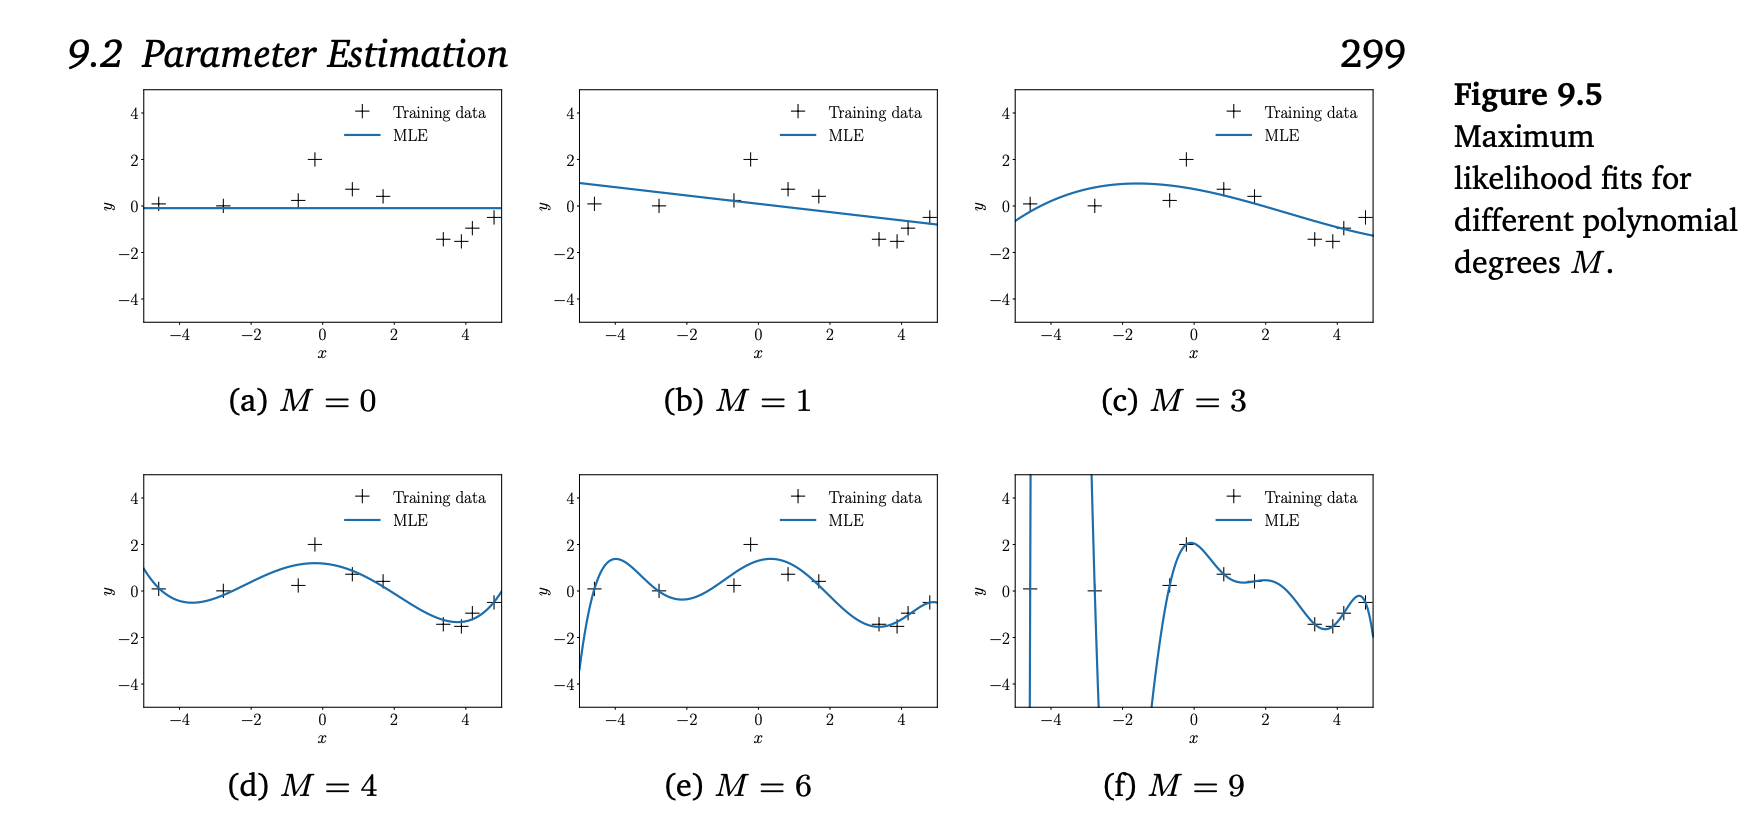

...than data points, and would need to solve an underdetermined system of linear equations ($\Phi^\top \Phi$ in (9.19) would also no longer be invertible) so that there are infinitely many possible maximum likelihood estimators.

Figure 9.5 shows a number of polynomial fits determined by maximum likelihood for the dataset from Figure 9.4(a) with $N = 10$ observations. We notice that polynomials of low degree (e.g., constants $(M = 0)$ or linear $(M = 1))$ fit the data poorly and, hence, are poor representations of the true underlying function. For degrees $M = 3, \dots, 6$, the fits look plausible and smoothly interpolate the data. When we go to higher-degree polynomials, we notice that they fit the data better and better. In the extreme case of $M = N - 1 = 9$, the function will pass through every single data point. However, these high-degree polynomials oscillate wildly and are a poor representation of the underlying function that generated the data, such that we suffer from *overfitting*.

Remember that the goal is to achieve good generalization by making accurate predictions for new (unseen) data. We obtain some quantitative insight into the dependence of the generalization performance on the polynomial of degree $M$ by considering a separate test set comprising 200 data points generated using exactly the same procedure used to generate the training set. As test inputs, we chose a linear grid of 200 points in the interval of $[-5, 5]$. For each choice of $M$, we evaluate the RMSE (9.23) for both the training data and the test data.

Looking now at the test error, which is a qualitative measure of the generalization properties of the corresponding polynomial, we notice that initially the test error decreases; see Figure 9.6 (orange). For fourth-order polynomials, the test error is relatively low and stays relatively constant up to degree 5. However, from degree 6 onward the test error increases significantly, and high-order polynomials have very bad generalization properties. In this particular example, this is also evident from the corresponding...

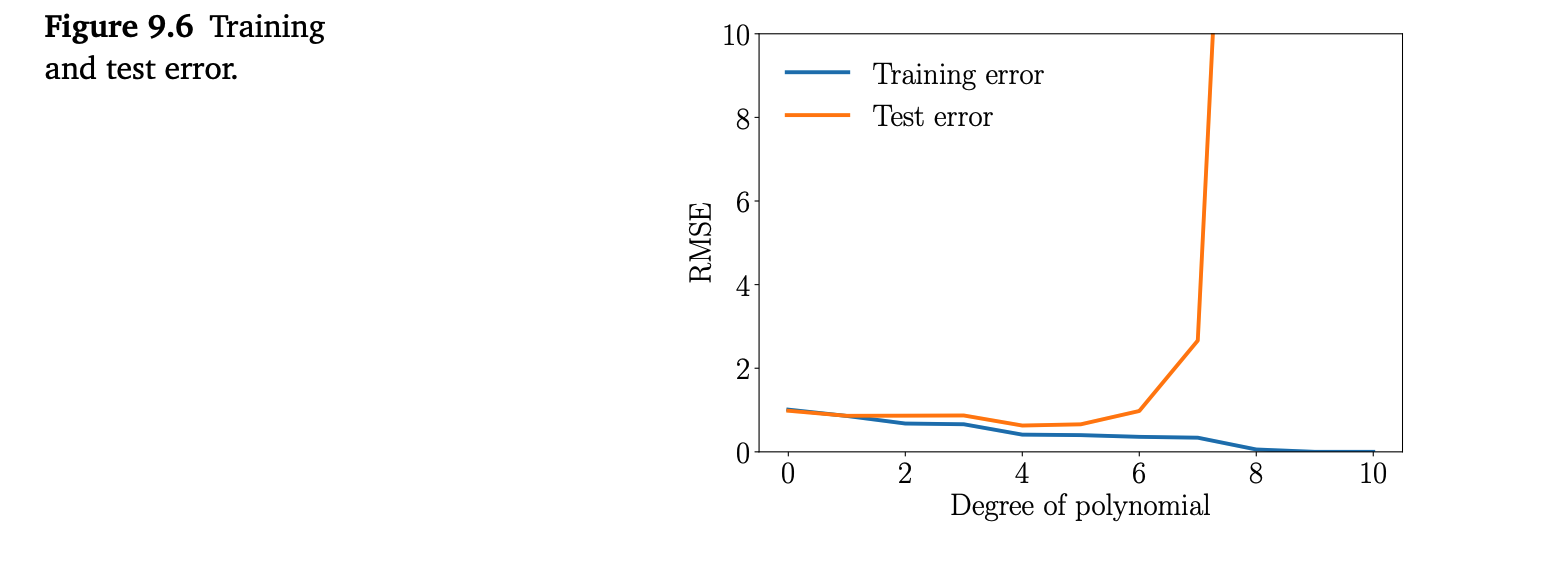

maximum likelihood fits in Figure 9.5. Note that the *training error* (blue curve in figure 9.6) never increases when the degree of the polynomial increaes. In our example, the best generalization (the point of the smallest *test error* is obtained for a polynomial of degree M = 4. 

## 4.2 Lesson: Linear Regression Example 
Directly solving for the linear regression coefficients requires a mix of calculus and linear algebra, which we have not covered yet, so we will rely on pre-built solvers for now.

### Example Data: A Wavy Line
As an example to demonstrate linear regression, we will use data generated with the following formula

$$
y = x + 2 + 0.1 sin(10x)
$$

With this truth, we should expect a regression line like 

$$
f(x) = x + 2
$$

The linear regression won't be able to capture the sine function but should figure out the $x + 2$, which is linear

In [70]:
import math

X_raw = list(range(6))

def wavy(x):
    return x + 2 + 0.1 * math.sin(10 * x)

X = [[x] for x in X_raw]
Y = [wavy(x) for x in X_raw]

X_test = [v / 100 for v in range (501)]

- `import math` loads Python's built-in `math` library. That will let us call `math.sin` later.
- `X_raw` is just a list of integers here.
- `X` is a list of lists of integers. We only have one input variable now, but soon, we will want to have multiple input variables at once. Each of those inner lists corresponds to one row of data, and additional input columns (variables) will be added as additional values in those innermost lists.
- `Y` is just a list of the target numbers that the regression is trying to match.
- `X_test` is a list of points sampled 0.01 apart that will be used to test the regressed functions later.

#### Code Notes
The next block of code plots the training data. It's pretty close to a straight line, but not quite.

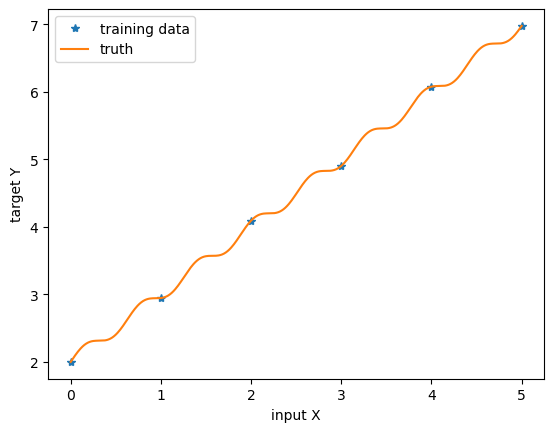

In [71]:
import matplotlib.pyplot as plt
 
plt.plot(X, Y, "*", label="training data")
plt.plot(X_test, [wavy(x) for x in X_test], "-", label="truth")
plt.xlabel("input X")
plt.ylabel("target Y")
plt.legend()
plt.show()

- `import matplotlib.pyplot as plt` loads the Matplotlib subpackage `pyplot` and makes it available under the name `plt`. Most online code does that renaming to `plt` to make references shorter. With out `as plt`,  you'd have to type in `matplotlib.pyplot` instead of `plt` each time you used it. We'll follow that import style to match most of the examples you'll find online.
- `plt.plot` is the function to call to generate a new chart like below. the first parameter here is for values along the x(horizontal axis), and the second is for the values along the y(vertical) axis.
- the $*$ in the `plot` call is to change the style from  lines to a star at each data point.
- the `label` parameter is optional, but is used for the legend. 
- `plt.xlabel` adds the label for the x(horizontal) access below the chart.
- `plt.ylabel` adds the label for the y(vertical) access to the left of the chart.
- `plt.legend` is the function that adds the legend. It won't be rendered otherwise.
- `plt.show` finishes generating the plot It is not styrictly necessary while working with jupyter, but has a side effect surpressing unecessary output from the previous `plt` calls. You will need `plt.show` when saving these charts to a file. 

## 4.3 Lesson: What is Numpy?

NumPy is a Python library whose core feature is very efficient array representations to store lots of numbers and a vast library of functions to manipulate them. In this module, we will be using NumPy's implementation of many of the mathematical operations that we discuss so that you can focus on what they are doing and how they relate to your problem at hand. Computer scientists have spent decades optimizing efficient representations and algorithms using them. NumPy lets you leverage most of that work with a few lines of Python.

You'll learn more about why NumPy is more efficient and explore its library as you expand your understanding of Python.

#### Code example

In [72]:
X

[[0], [1], [2], [3], [4], [5]]

In [73]:
import numpy as np
np.asarray(X)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [74]:
Y

[2.0,
 2.9455978889110632,
 4.091294525072763,
 4.901196837590714,
 6.074511316047935,
 6.973762514629607]

In [75]:
np.asarray(Y)

array([2.        , 2.94559789, 4.09129453, 4.90119684, 6.07451132,
       6.97376251])

- Jupyter environments usually have NumPy preinstalled. You will probably need to install it in other environments.
- `import numpy as np` makes the NumPy Python library available via the name `np`. Most NumPy code online uses this import, and example code assumes the usage of np, so we will follow this convention.
- NumPy has its own array representation, but most NumPy functions will accept inputs that are sufficiently array-like. For example, a list of numbers will be treated like a 1-dimensional array. A list of lists of numbers will be treated like a 2-dimensional array. This lets you call NumPy functions without code to switch representations.
- NumPy functions generally return NumPy's own arrays, but most of the time, you can use those in exactly the same way as a list of numbers.
- NumPy's asarray will convert array-like objects into NumPy's array representation. Example conversions are in the code example above.


## 4.4 Lesson: Solving Least Squares with NumPy (Part 1)

The first implementation we'll look at uses the NumPy library's linear least squares solver, `numpy.linalg.lstsq`. If you take apart that name, `numpy.linalg.lstsq`, the three parts stand for the library NumPy, linear algebra (to be covered in more detail later in this module), and least squares.

Here is a simplified description of what `lstsq` does.

Given input $x$ with $m$ rows and $n$ columns (equivalently $m$ data points with $n$ variables), where $X_{ij}$ is the value in the $ith$ row and $jth$ column (the $ith$ data point's $jth$ variable0. and target $Y$ with $m$ rows, return $C$ with $n$ rows such that 


$$
\sum_{i=1}^{m} \left( \sum_{j=1}^{n} \left( X_{i,j} * C_j \right) - Y_i \right)^2
$$

is minimized.

This should look very similar to the linear regression optimization, except there is no additive constant. For the one variable $y = mx + b$ case, it is the same as if $b$ was forced to be zero.

For any number of variables, if there is no additive constant, and all the variables are set to zero, then the linear model's prediction will always be zero. This is a significant limitation, but let's look at what we can do with `lstsq` anyway.

#### Code Example
This code will use lstsq to compute the regression.

coefficients = array([1.54542973])
model formula: y = 1.5454297325303368x


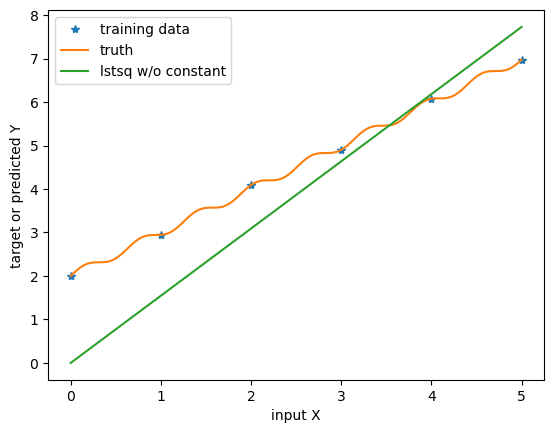

In [76]:
coefficients_only = np.linalg.lstsq(X, Y, rcond=None)[0]
print(f"coefficients = {coefficients_only!r}")
print(f"model formula: y = {coefficients_only[0]}x")

plt.plot([x[0] for x in X], Y, "*", label="training data")
plt.plot(X_test, [wavy(x) for x in X_test], "-", label="truth")
plt.plot(X_test, [v * coefficients_only[0] for v in X_test], label="lstsq w/o constant")
plt.xlabel("input X")
plt.ylabel("target or predicted Y")
plt.legend()
plt.show()

- The above code uses NumPy's `lstsq` function to calculate a linear least squares solution.
- `lstsq` returns an array of coefficients. You will have to calculate the predictions yourself.

Note how the predictions using `lstsq` start at zero when the input is zero. The predictions are far off when $𝑥$ is around zero, but they get closer to the later training data points. We should be able to make a better linear model if it was not constrained to start from zero when the input is zero.

### Resources | numpy.linalg.lstsq
(https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)

`linalg.lstsq(a, b, rcond-None)`

Return the least-squares solution to a linear matrix equation. 

Computes the vector $x$ that approximately solves the equation `a @ x = b`. The equation may be under-, well-, or over-determined (i.e., the number of linearly independent rows of a can be less than, equal to, or greater than its number of linearly independent columns). If a is square and of full rank, then $x$ (but for round-off error) is the “exact” solution of the equation. Else, $x$ minimizes the Euclidean 2-norm $||b-ax||$. If there are multiple minimizing solutions, the one with the smallest 2-norm $||x||$ is returned.

#### Examples:
Fit a line, `y = mx + c`, through some noisy data-points.

In [77]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

By examining the coefficients, we see that the line should have a gradient of roughly 1 and cut the y-axis at, more or less, -1.

We can rewrite the line equation as `y = Ap`, where `A = [[x 1]]` and `p = [[m], [c]]`. Now use `lstsq` to solve for p:

In [78]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [79]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c

(0.9999999999999999, -0.9499999999999994)

plot the dta along the fitted line

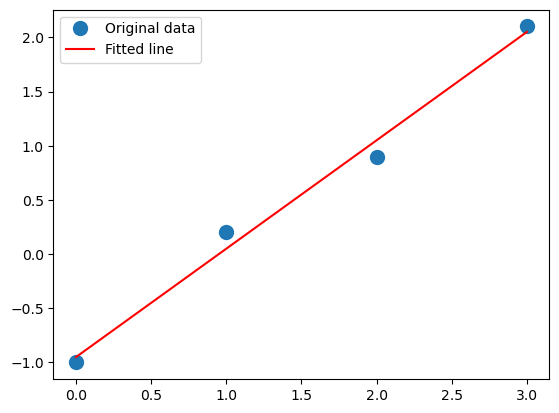

In [80]:
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

## 4.5 Lesson: Solving Least Squares with NumPy (Part 2)
In the previous regression using `lstsq`, we only regressed the coefficient for $x$ and effectively left the additive constant pinned at zero. In terms of our one-variable linear equation,

$$
y = mx + b
$$

We forgot about $b$, so $b$ defaulted to zero. If you look at the chart above, the resulting function was forced to miss a lot when $x = 0$, because $mx + b$ is always $b$ when $x=0$. How do we regress $b$ with `lstsq`?

The root issue is that `lstsq` only regresses one coefficient per variable, and we only passed in one variable. There is a trick we can use to regress $b$. If we add another variable that is always set to 1, then that variables coefficient will be $b$. We'll use that trick for linear regression with `lstsq`. 

If you are regressing with multiple (real) variable, you only need to add one extra column for the additive constant. You can also use this trick for non-linear regressions if you can express htem as sums of coefficients and known functions of the input variables. For example, you can compute a quadratic regresssion of one variable by making the input have columns $x^2$, $x$, and $1$. 

#### Code Example
This code shows how to run the regression with `lstsq` and the missing additive constant:

In [81]:
# this conversion has been happening automatically while calling NumPy and sklearn functions.
np.asarray(X)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [82]:
np.ones((len(X), 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [83]:
X_with_constant = np.hstack((X, np.ones((len(X), 1))))
X_with_constant

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.]])

In [84]:
coefficient_and_constant = np.linalg.lstsq(X_with_constant, Y, rcond=None)[0]
print(f"coefficient and constant = {coefficient_and_constant!r}")
print(f"model formula: y = {coefficient_and_constant[0]}x + {coefficient_and_constant[1]}")

coefficient and constant = array([1.00187015, 1.99305181])
model formula: y = 1.0018701476307599x + 1.9930518112984474


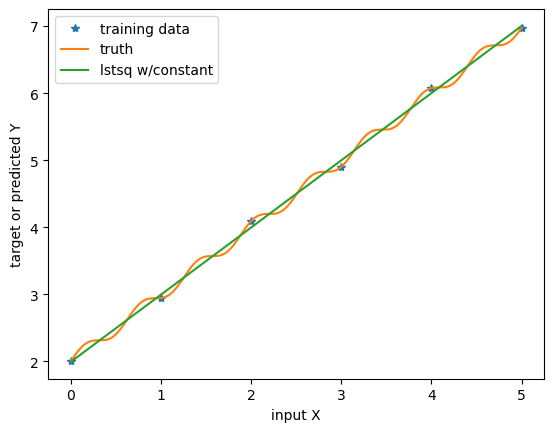

In [85]:
plt.plot([x[0] for x in X], Y, "*", label="training data")
plt.plot(X_test, [wavy(x) for x in X_test], "-", label="truth")
plt.plot(X_test, [v * coefficient_and_constant[0] + coefficient_and_constant[1] for v in X_test], label="lstsq w/constant")
plt.xlabel("input X")
plt.ylabel("target or predicted Y")
plt.legend()
plt.show()

- `np.ones` creates an array of all ones for a given size. The size should be passed in as a tuple for each dimension. In this case, the fist one is `len(x)`, the number of data points. The second one is just one for one column in this array.
- `np.hstack` lets us combine arrays togetehr as if they were laid down next to each other from left to right. We will combine X and a columns of ones this way as a new input for `lstsq`. 

The new regression is much better! Examining the formula, we see that teh coefficients are close to those of the formula actually used.

$$
f_{truth}(x) = 1x + 2 + 10sin(x)
$$

$$
f_{regression}(x) = 1.00187014763076x + 1.930518112984463
$$

Why are the regressed coefficients different from the true formula? The short answer is that the regression isn't able to replicate the $10\sin(x)$ term exactly, and it adjusts the fit trying to better match the sin wave on this range. In this case, it appears the sin term slightly pulled down the lower end around $x=0$ and slihgtly pulled up the right side around $x=5$. Given more data, especially over a wider range of input values, the regression would pick coefficients closer ot those in the true formula. 

## 4.6 Lesson: Solving Linear Regression with Scikit-Learn

We just saw how to implement linear regression with NumPy. It didn't take a lot of code, but you probably felt there was more work than necessary to get the additive constant working. We'll now look at implementing linear regression using `scikit-learn`, another Python library that is built on top of NumPy.

The linear regression model built with scikit-learn has three advantages over the NumPy approach:

1. The data transformations for the additive constant are handled automatically. If you don't want the additive constant for some reason, there is a flag to turn it off.
2. The models of scikit-learn also have a predict method, so you don't have to write code to calculate the output like we did earlier with NumPy. You'll see that momentarily.
3. The models of scikit-learn have a standard fit/predict interface, so you can use other kinds of models just as easily as linear regression.

#### Code Notes
The following import makes the scikit-learn class `LinearRegression` available.

In [86]:
from sklearn.linear_model import LinearRegression

- Jupyter environments usually have scikit-learn preinstalled. You will probably need to install it in other environments.
- scikit-learn uses NumPy internally. Like NumPy, most of scikit-learn's methods can take in any array-like data, but they usually return NumPy arrays.
- The following import statement loads scikit-learn but only makes the `LinearRegression` class available. As usual, we are using the most common online imports so that you will recognize them.

#### Code Example
This code uses scikit-learn’s LinearRegression class to run the same regression.

In [108]:
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [87]:
sk_model = LinearRegression()
sk_model.fit(X,Y)
print(f"coefficients = {sk_model.coef_!r}") #coefficients
print(f"intercept = {sk_model.intercept_!r}") #intercept
print(f"model formula: y = {sk_model.coef_[0]}x + {sk_model.intercept_}") #formula

coefficients = array([1.00187015])
intercept = 1.993051811298446
model formula: y = 1.0018701476307603x + 1.993051811298446


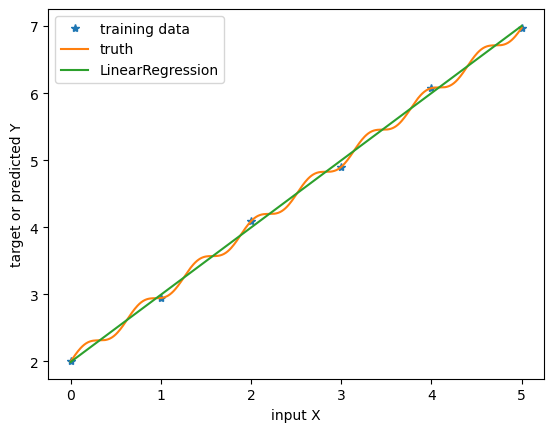

In [88]:
plt.plot([x[0] for x in X], Y, "*", label="training data")
plt.plot(X_test, [wavy(x) for x in X_test], "-", label="truth")
plt.plot(X_test, sk_model.predict([[v] for v in X_test]), label="LinearRegression")
plt.xlabel("input X")
plt.ylabel("target or predicted Y")
plt.legend()
plt.show()

- `sklearn.linear_model.LinearRegression()` returns a fresh, untrained linear regression model. If you do not want an additive constant, add `fit_intercept=false` here and the intercept will be set to zero.
- `fit()` on this model does the actual regression. It fits the parameters to the training data.
- `.coef_` is the coefficients fo the linear model. That is, they are the numbers multiplied with the input values.
- `.intercept_` is the additive constant in the linear model. This model does not need a dummy column of all ones.
- `predict()` on this model will calculate predictions based on the regressed linear model.

Scikit-learn's `LinearRegression` class computes the same linear regression model as NumPy's `lstsq` with the dummy constant but with less setup work and easier predictions. Internally, both approaches do the same calculations, but the `LinearRegression` class is less work for you, and you'll see later that it has a more standard interface. Generally, we'll recommend just using the `LinearRegression` class unless you have a specific or different need.

We took a peek at `.coef_` and `.intercept_` above to print out the linear equation, but you don't need to do this in general.

## 4.7 Lesson: Linear Regression with Multiple Inputs

Linear regression with multiple input columns (variables) is mechanically very similar to linear regression with one variable. For both the NumPy and scikit-learn implementations, the same code to regress the model works with multiple variables. For prediction, both versions have slight tweaks to pass in more data, and NumPy needs a minor formula change.

Two important things change with multiple input columns.

1. Visualizations change significantly. We can no longer plot predictions vs. input variables since there is more than one input variable. (The two variable case is possible, but there are significant trade-offs.) We will handle this with new visualizations comparing predictions and actual values.
2. The variables can interact. This is not specific to linear models; all models will need to decide how to attribute various output changes across variables. This is a complicated subject. We will scratch the surface later in this module when we cover dependencies and correlations between variables.

In [89]:
!wget https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/mango-tiny.tsv

--2024-09-27 06:54:15--  https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/mango-tiny.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207 [text/plain]
Saving to: ‘mango-tiny.tsv.1’

mango-tiny.tsv.1    100%[===================>]     207  --.-KB/s    in 0s      

2024-09-27 06:54:16 (4.70 MB/s) - ‘mango-tiny.tsv.1’ saved [207/207]



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

mango_data = pd.read_csv('mango-tiny.tsv', sep="\t")
mango_data

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness,rated_flavor
0,1,5,4,0,4,4,5
1,1,5,5,1,5,5,1
2,2,4,3,1,3,3,3
3,3,3,2,0,2,1,2
4,5,1,1,1,1,1,1
5,4,2,1,1,1,1,1
6,5,1,1,1,2,1,1
7,3,3,2,1,2,2,2


In [3]:
X_mango = np.random.normal(3, 1, size=(100, 3))
print(X_mango.shape)
Y_mango = X_mango.mean(axis=1) + np.random.normal(0, 1, size=(X_mango.shape[0],))
print(Y_mango.shape)

(100, 3)
(100,)


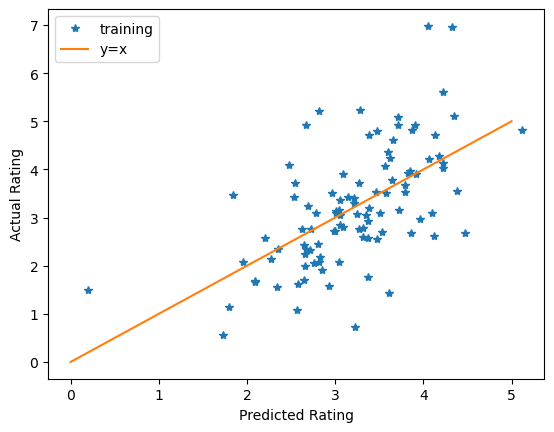

In [9]:
model_mango = LinearRegression() #returns a fresh, untrained linear regression model
model_mango.fit(X_mango, Y_mango) #fits the parameters to the training data.
Y_mango_predicted = model_mango.predict(X_mango) #calculate predictions based on the regressed linear model.

#plt.plot(Y_mango_predicted, Y_mango, "*", label="training")
plt.plot(Y_mango_predicted, Y_mango, "*", label="training")
plt.plot([0, 5], [0, 5], label="y=x")
plt.legend()
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.show()

- It is important to note that charts like this one show very different data than the previous ones based on just one input variable.
- In the earlier charts, the x-axis was the input variable. In this chart, the x-axis is the model prediction.
- In the earlier charts, the line was the model predictions for each value of the input variable. In this chart, the line is the identity y=x because the x-axis is the model prediction, and the y-axis is also the prediction.

For both charts,

- Each point represents a single data point. The point's vertical position represents its actual value, and its relative position above or below the line is its residual.
- An accurate model will have all the points clustered close to the line.

If you observe the model making inaccurate predictions on the left, for the earlier charts that means the model is making mistakes when the input value is low, while for this chart it means the model is making mistakes when its prediction is low. Similarly, if you observe the model making inaccurate predictions on the right, for the earlier charts that means the model is making mistakes when the input value is high, while for this chart it means the model is making mistakes when its prediction is high.

## 4.8 Lesson: Linear Regression & Outliers

We will now look at some examples of how linear regression is affected by outliers.

We will see that the response varies significantly based on whether the outlying data points are in the middle of the inputs or off on the side.

- Think about what was changed in the data
- Try to guess where the regression line will move, and how far

Function to take in a sequence of y values, compute the linear regression, and plot both the linear regression line and the sample points

In [93]:
def plot_regression(Y):
    plt.plot(Y, "*", label="raw")
    
    X = np.asarray(range(len(Y))).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X,Y)
    print(f"f(X) = {model.coef_[0]} X + {model.intercept_}")
    
    plt.plot(model.predict(X), label="regression")
    plt.plot([0, len(Y)-1], [0, len(Y)-1], label="y=x")
    plt.legend()

f(X) = 1.0000000000000002 X + -4.440892098500626e-16


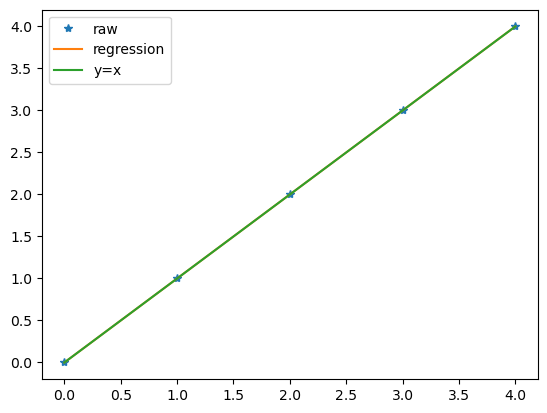

In [94]:
plot_regression([0,1,2,3,4])

f(X) = 1.0000000000000002 X + 0.7999999999999994


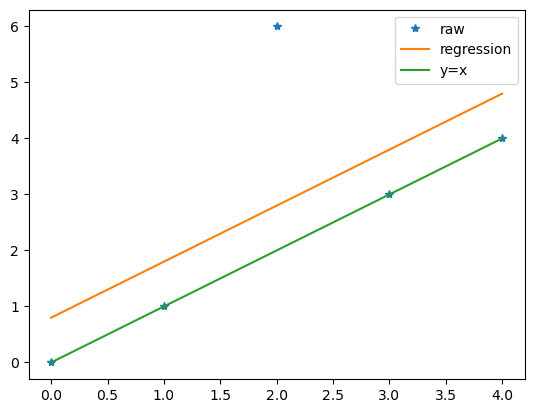

In [95]:
plot_regression([0,1,6,3,4]) #moves the line up, but does not change the slope

f(X) = 0.2 X + 2.4


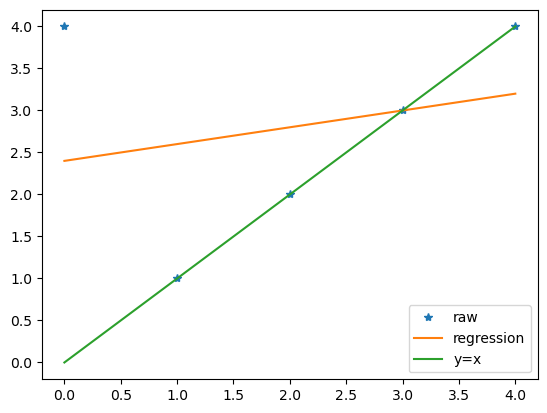

In [96]:
plot_regression([4,1,2,3,4]) #both slope and constant change

Because linear regression uses the quadratic loss function, bigger errors for that sample have an outsized impact on the loss function. In this case, it worked out that reducing the residual at x = 0 reduced the loss function to compensate for the residuals growing at all the other data points. 

If we change the rightmost data point, we should see a similar change, but in the other direction

f(X) = 1.8000000000000007 X + -0.8000000000000016


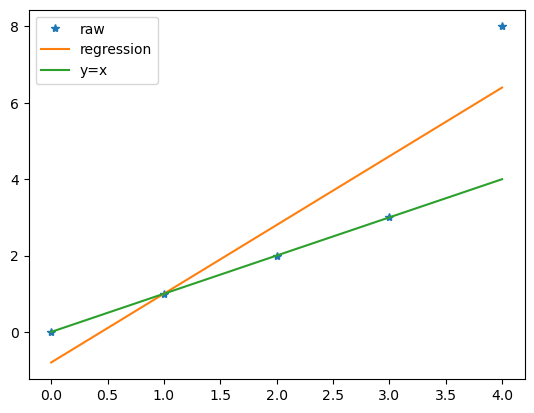

In [97]:
plot_regression([0,1,2,3,8])

If we change one of the data points, but not the exact middle, the line will move again, but not so much because the end data points would then have the big residuals. 

f(X) = 0.8 X + 0.7999999999999998


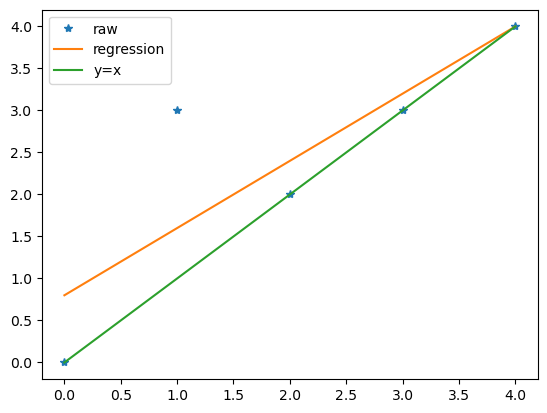

In [98]:
plot_regression([0,3,2,3,4])

f(X) = 1.0022556390977444 X + 0.12857142857142811


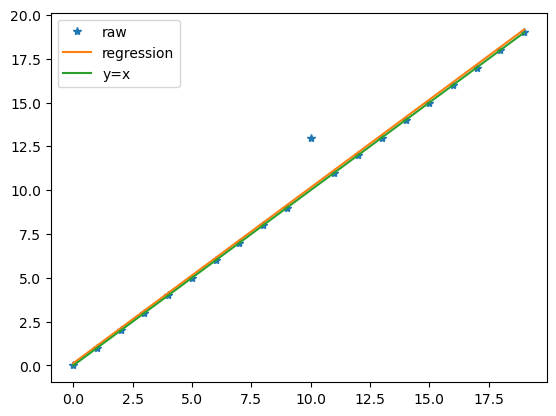

In [99]:
plot_regression([0,1,2,3,4,5,6,7,8,9,13,11,12,13,14,15,16,17,18,19])

In this case, the slope changed, but only a little bit. There is a modest additive constant, so there are small errors all along this range. Since the slope is off, if we go out to plus or minus a million, we'll get big errors, but those errors will take a while to grow big. 

Is there any way you could improve the regression for that one outlier point without a huge impact on the other data points? The answer is no, moving the regression closer to the outlier will increase the errors for most or all of the other data points.

- Regression tries to balance errors across all the training data points
- reducing the loss from one data point is usually at the expense of increasing the loss at other data points
- loss functions help manage those trade offs and determine when those tradeoffs should be taken
- outliers on the edges tend to have mroe leverage to change the regression line, than outliers in the middle, because adjusting the regression on the edges tends to change the middle less. 

## 4.10 Lesson: Introduction to Random Variables

We will now shift our focus to random variables, the basis for how we describe and quantify uncertain events. This week we will start with discrete random variables to get a feel for the concepts and establish notation. Then over the next three weeks, we will expand the notation and usage of random variables and explore how we can reason about the connections among different random variables. Throughout that exploration, we will make connections to modeling and how understanding the random variables involved will help us build better models.

#### Learning Objectives
By the end of this topic, you should be able to:
- Describe situations with discrete random variables, and give examples where they are useful
- Create a histogram from data for a discrete random variable
- Describe what it means to sample a distribution, and implement sampling from a given dataset
- Compute probabilities within a sample dataset
- Explain and compute entropy for a distribution

What is a random variable? The pragmatic approach is that a random variable is a variable or family of variables (like a column of data) where the value or values have uncertainty at some point. This does not mean that we will never know the value, and it does not mean that we know nothing about the value. It just means that we did not always know it.

A good example of a random variable is the weather. Recent past weather is generally well known, but the weather tomorrow morning always has some uncertainty.

However, just because we do not know what the weather will be with absolute certainty, it does not mean that we have no idea what the weather will be and that a heat wave, six inches of rain, or a foot of snow are equally likely. Every weather channel and weather app will give you a prediction for the next day's weather, and some of them will even be right more often than wrong.

That, by the way, is another set of random variables—will a given weather forecast be correct for a given date and location?

#### Read | Mathematics for Machine Learning, Chapter 6-6.1: Probability and Distributions. 

https://mml-book.github.io/book/mml-book.pdf

This reading introduces the ideas of probability, and particularly spends time on the interpretation of probabilities.

Probability, loosely speaking, concerns the study of uncertainty. Probability can be thought of as the fraction of times an event occurs, or as a degree of belief about an event. We then would like to use this probability to measure the chance of something occurring in an experiment. We often quantify uncertainty in the data, uncertainty in the machine learning model, and uncertainty in the predictions produced by the model. Qunatifying uncertainty requires the idea of a random variable, which is a function that maps outcomes of random experiments to a set of properties that we are interested in. Associated with the random variable is a function that measures teh probability that a particular outcome will occur, also called the probability distribution.

Probability distributions are used as a building block for other concepts, such as probabilistic modeling, graphical models, and model selection. In the next section, we present the three concepts that define a probability space (the sample space, the events, and the probability of an event) and how they are related to a
fourth concept called the random variable.

##### 6.1 Construction of a probability Space

The theory of probability aims at defining a mathematical structure to describe random outcomes of experiments. For example, when tossing a single coin, we cannot determine the outcome, but by doing a large number of coin tosses, we can observe a regularity in the average outcome. Using this mathematical structure of probability, the goal is to perform automated reasoning, and in this sense, probability generalizes logical reasoning.

E.T. Jaynes identified 3 mathematical criteria which must apply to all plausibilities:
1. The degress of plausibility are represented by real numbers
2. These numbers must be based on the rules of common sense.
3. The resulting reasoning must be consistent, with the three following meanings of the word “consistent”:
    1. Consistency or non-contradiction: When the same result can be reached through different means, the same plausibility value must be found in all cases.
    2. Honesty: All available data must be taken into account.
    3. Reproducibility: If our state of knowledge about two problems are the same, then we must assign the same degree of plausibility to both of them.
    
These rules are the rules of probability. 


##### 6.1.2 Probability and Random Variables

Modern probability is based on a set of axioms that introduce the concepts of sample space, event space,and probability measure. The probability space models a real-world process (experiment) with random outcomes. 

**The sample space $\Omega$**
The set of all possible outcomes of the expiriment.

**The event space $A$**
The event space is the space of potential results of the experiment.

**The probability $P$**
The probability or degree of belief that the event will occur. $P(A)$ is called the probability of A.

- The probability of a single event must lie in the interval $[0,1]$, and the total probability over all outcomes in the sample space $\Omega$ must be 1, i.e., $P(\Omega) = 1$. 
- In machine learning we refer to probabilities in quantities of interest, which we denote by $\top$

## 4.11 Lesson: Quantifying Random Variables

If we deeply understand a random variable, we can assign probabilities to the outcomes. For example, if a coin is fair, we can say that the probability that it is heads after flipping it is 50%. If we enumerate all the possible values for a given random variable and sum up all their probabilities, the total should be 100%. Let's formalize that now.

#### Defintion: 
$P(b)$ is the probability that a boolean (true or false) expression is true. For any boolean $b, 0 \leq P (b) \leq 1$.

For a given random variable $x$, 

$$
\sum_{v \in \text{values}(x)} P(x = v) = 1
$$

#### Definition: Probability Distribution

For a given random variable $x$, the mapping from values $v$ to probabilities $P(x=v) is called the probability distribution.

If the number of possible values is modest, you might represent a probability distribution in Python as a dictionary `{v : P(x=v) for v in ...}` 

Where do we get the probabilities for each possible value of $x$? That depends on the nature of $x$. Sometimes we can derive the probabilities from the definition, like fair coins having the same probability of heads or tails. For many problems, we often end up modeling the probabilities based on data.

Once we have determined the probabilities for each possible value of a random variable, we can quantify the overall uncertainty of the distribution with entropy.

#### Defintion: Entropy
The definition of a random variable $X$ is 

$$
H(X) = - \sum_{x \in X} P(X = x) \log_b P(X = x)
$$

The base $b$ of the lograithm does not matter as long as it is consistent; changing the logarithm base just changes the entropy value by a constant factor. 

Entropy is often described as measuring the average amount of information of a random variable. Computer scientists tend to prefer using base two for the logarithm, in which case the entropy measures the average number of bits to represent a sample X value in an idealized representation. Arithmetic compression is near optimal by this standard, just rounding up the idealized number of bits to a whole number for each block of data encoded.

For a given number $k$ of possible values, entropy is maximized if each value has probability $\frac{1}{k}$. Intuitively, this corresponds to knowling that the values are possible but knowing which ones to prefer. This maximum value has some connections to the previous usage of the word entropy; before information theory, entropy already was used for the logarithm of the number of possible states in statistical thermodynamics.

#### Definition: Perplexity

The perplexity of a random variable $X$ is 

$$
PP(X) = b^{H(X)}
$$

Where $b$ is the same base used in the logarithm when calculating the entrop $H(X)$.

If $PP(X) = k$ where $k$ is a positive integer, then the entropy $H(X)$ is the same number as where $k$ were possible values each with probability $\frac{1}{k}$. This leads to the interpretation of perplexity as the number of equal weight choices to have the same uncertainty. 

Perplexity is often reported as a metric when evaluating large language models.




## Lesson 4.12: Probability Distributions from Sample Data

Suppose we have sampled a population and now have a dataset of $m$ rows and $n$ columns. By picking a random number from $0$ to $m - 1$ uniformly random (equally likely), we can randomly sample our dataset. This gives us $n$ random variables, one for each column. 

The $i$th random variable has the same descriptive statistics as the $i$th column, since the $i$th column defines its distribution. The probability of the $i$th random variable taking on the value $v$ will be the number of times $v$ will be the number of times $v$ occurs in the $i$th column divided by $m$, the number of rows. Values that do not occur in the $i$th column will have probability zero. These probabilities are more formally called the sample distribution. 

#### Definition: Sample Distribution

Given a sample dataset $X$ of $m$ rows and $n$ columns, the samle distribution is the distribution induced by picking one row uniformly at random. 

Depending on the context, the sample distribution of interest may be for a subset of the columns or a single column. In that case, it is usually clearer to refer to the sample distribution of $X$ narrowed down to just those columns.

#### Definition: Sample Probability

The sample probability $P(x_j=V)$ of getting the value $v$ when sampling the $i$th column of dataset $X$ with $m$ rows is:

$$
P(x_j = v) = \frac{1}{m} \sum_{i=0}^{m-1} \left( X_{i,j} = v \right)
$$

This formula uses the convention that true expressions are treated as one and false expressions are treated as zero when summed. Python uses the same convetnion with its built-in boolean type.

#### Definition: Resampling

Resampling is any process based on drawing samples from a sample distribution.

Bootstrapping, covered in Week 2, is an example of resampling. The term resampling is not always used, but when it is used, it emphasizes two points:

- Resampling draws from a sample distribution, not the population distribution.
- Resampling can be done an unlimited number of times since the distribution is completely determined by the sample. How these points contribute positively or negatively will vary situationally.

#### Resampling in Python

How to easily resample a dataset in Python. The method used works both for built-in Python sequences and NumPy arrays.

In [100]:
X = [[1,2], [3,4], [5,6]]
X

[[1, 2], [3, 4], [5, 6]]

In [101]:
import random
random.choice(X)

[5, 6]

In [102]:
#will work with numpy arrays
import numpy as np
X = np.asarray(X)
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [103]:
random.choice(X)

array([3, 4])

## 4.13 Lesson: Statistics from Probability

### Mean of a Probability Distribution

We previously defined the mean of a sample of $n$ values with the following formula:

$$
\text{mean}(x) = \frac{\sum_i x_i}{n}
$$

Given a probability distribution for variable $x$ instead, the mean of $x$ is defined in terms of its probabilities, and we use the notation $\mathbb{E}[x]$ and call it the expected value of $x$ instead:

$$
\mathbb{E}[x] = \sum_v P(x = v) \cdot v
$$

### Variance of a Probability Distribution

The variance of a sample of $n$ values was previously defined as follows:

$$
\text{Var}(x) = \frac{\sum_i (x_i - \text{mean}(x))^2}{n}
$$

For a probability distribution, we define the variance this way, taking advantage of the $\mathbb{E}[ ]$ notation for a concise formula:

$$
\text{Var}(x) = \mathbb{E}[(x - \mathbb{E}[x])^2]
$$

In [107]:
#Help me answer this question! I've made the table into a dictionary of lists, similar to a dataframe:

Color_Size_Dataset = {
    "color": ["red", "red", "green", "blue", "blue", "green", "purple", "purple", "orange", "orange"],
    "size" : ["small", "small", "small", "medium", "large", "large", "huge", "small", "small", "small"]
}

Color_Size_df = pd.DataFrame(Color_Size_Dataset)
Color_Size_df

,color,size
0,red,small
1,red,small
2,green,small
3,blue,medium
4,blue,large
5,green,large
6,purple,huge
7,purple,small
8,orange,small
9,orange,small
